### Import the relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### Data generation

In [2]:
observations = 1000 #size

xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1, 1, (observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

np.savez('TF', inputs=generated_inputs, targets=generated_targets) # format for tensors

### Solving with TensorFlow

In [3]:
training_data = np.load('TF.npz')

In [5]:
input_size = 2
output_size = 1

model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size)
]) #sequential means we are laying down the model
#layers.dense calculates the dot product between the inputs and weights and adds the bias

model.compile(optimizer='sgd', loss='mean_squared_error')

model.fit(training_data['inputs'],training_data['targets'], epochs=100, verbose=1)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 43.0746
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.2971
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6854
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7311
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4580
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4178
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3635 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3573
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3535
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3491
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3499
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3303
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3429
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3693
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3610
Ep

### Extract the weights and bias

In [6]:
model.layers[0].get_weights()

[array([[ 2.0292606],
        [-3.0378826]], dtype=float32),
 array([4.962855], dtype=float32)]

In [9]:
weights = model.layers[0].get_weights()[0]
weights

array([[ 2.0292606],
       [-3.0378826]], dtype=float32)

In [10]:
bias = model.layers[0].get_weights()[1]
bias

array([4.962855], dtype=float32)

### Make predictions

In [12]:
model.predict_on_batch(training_data['inputs']).round(1)


array([[ 21.4],
       [ 13.6],
       [-25.3],
       [ 25.6],
       [-13.3],
       [-28.6],
       [  6.5],
       [  5.3],
       [-19. ],
       [-23.4],
       [-19.2],
       [ -3.7],
       [ 17.9],
       [ -1.1],
       [  5. ],
       [  7.3],
       [ -3.3],
       [ 31.4],
       [ 33.5],
       [-19.3],
       [  5.3],
       [-20.5],
       [ 14.2],
       [  4.9],
       [ -5.1],
       [ 15.2],
       [ -5. ],
       [ -6.8],
       [-30.9],
       [-13.7],
       [  2.4],
       [-23.1],
       [ 29.5],
       [-25.4],
       [ 28.9],
       [ 13.3],
       [ -4.5],
       [ 25.5],
       [ -5.6],
       [  0.9],
       [ -6.6],
       [ 36.2],
       [ -7.4],
       [  9.3],
       [-24.5],
       [ 30.1],
       [  1. ],
       [-37.5],
       [ 47.2],
       [-28.4],
       [ -3.4],
       [ 18.6],
       [ -0.3],
       [  5. ],
       [ 30.5],
       [ 37.7],
       [  4.4],
       [ -1.3],
       [  8.6],
       [  6.4],
       [ 44.1],
       [ 23.8],
       [

In [13]:
training_data['targets'].round(1)

array([[ 22. ],
       [ 13.8],
       [-24.2],
       [ 25.4],
       [-13.8],
       [-28.6],
       [  5.7],
       [  4.7],
       [-19.1],
       [-23.9],
       [-19.2],
       [ -2.9],
       [ 16.9],
       [ -0.5],
       [  6.1],
       [  7.2],
       [ -3.2],
       [ 31.4],
       [ 32.5],
       [-19.8],
       [  5.3],
       [-21. ],
       [ 14.1],
       [  5.5],
       [ -4.4],
       [ 15. ],
       [ -4.4],
       [ -6.9],
       [-29.4],
       [-13. ],
       [  1.7],
       [-22. ],
       [ 29.6],
       [-24.2],
       [ 28.9],
       [ 12.6],
       [ -4.7],
       [ 25.4],
       [ -5.1],
       [  1. ],
       [ -6.6],
       [ 36.4],
       [ -7.1],
       [  8.7],
       [-23.2],
       [ 29.5],
       [  0.2],
       [-36.9],
       [ 46.5],
       [-27.4],
       [ -3.8],
       [ 18. ],
       [ -1. ],
       [  4.5],
       [ 29.6],
       [ 37.1],
       [  4.4],
       [ -1.5],
       [  7.8],
       [  6.7],
       [ 42.7],
       [ 23.9],
       [

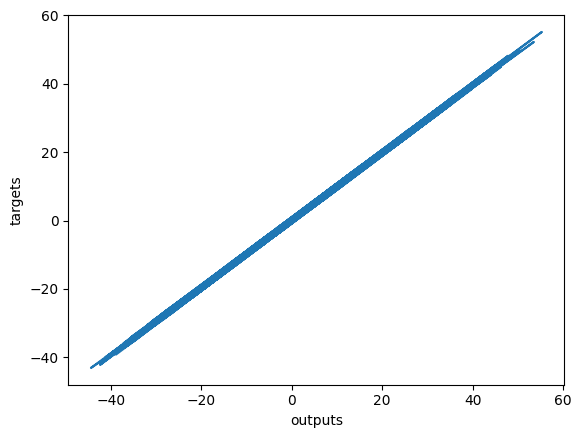

In [14]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show() #should be a 45 degree angle line